# 01wk-1 – draft

최규빈  
2023-09-04

> 박스플랏, 히스토그램

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/01wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

# import

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 2)  # 가로 6, 세로 4 크기의 그림
matplotlib.rcParams['figure.dpi'] = 150

## motivating example

**(예제1) 전북고등학교: 평균은 좋은 측정값인가?**

`-` 전북고등학교에서 통계학을 수업하는 A선생님과 B선생님의 있다.
A선생님에게서 수업을 들을 학생들의 평균은 79.1이고 B선생님에게서 수업을
들은 학생들의 평균은 78.3이다.

In [3]:
y1=[75,75,76,76,77,77,79,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,80,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

In [4]:
np.mean(y1), np.mean(y2)

In [5]:
arr = np.random.normal(size=(100,5))
arr.shape

In [6]:
np.mean(y1),np.mean(y2)

`-` 의사결정: A선생님에게 배운 학생들의 실력이 평균적으로 더 좋을
것이다.

`-` 평균은 A반(=A선생님에게 통계학을 배운 반)이 더 높다. 그런데 98점을
받은 학생이 A반에 포함되어서 A반이 전체평균이 높게 나온것이고 나머지
학생들은 전체적으로 B반 학생들이 더 시험을 잘 보았다고 해석할 수 있다.

`-` 교훈: 단순한 평균비교보다 학생들이 받은 점수의 분포를 비교해보는
것이 중요하다. 분포를 살펴보는 방법 중 유용한 방법이 박스플랏이다.

## matplotlib으로 boxplot 그리기

`-` A반 학생들의 박스플랏 그리기

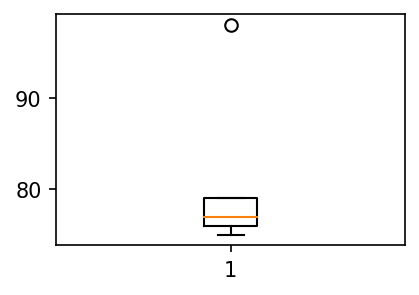

In [7]:
plt.boxplot(y1);

`-` B반 학생들의 박스플랏 그리기

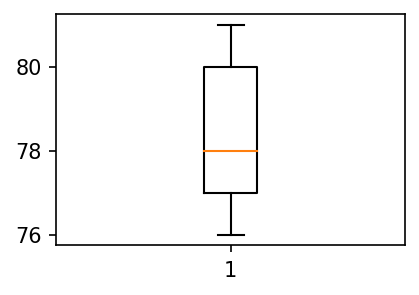

In [8]:
plt.boxplot(y2);

`-` A반 학생들의 점수와 B반 학생들의 점수를 나란히 박스플랏으로 그리자.

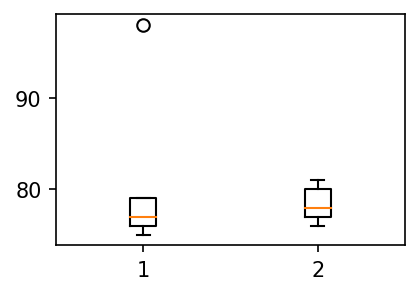

In [9]:
plt.boxplot([y1,y2]);

## boxplot이란?

`-` Galarnyk (2023)

-   <https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/box_plot.ipynb>

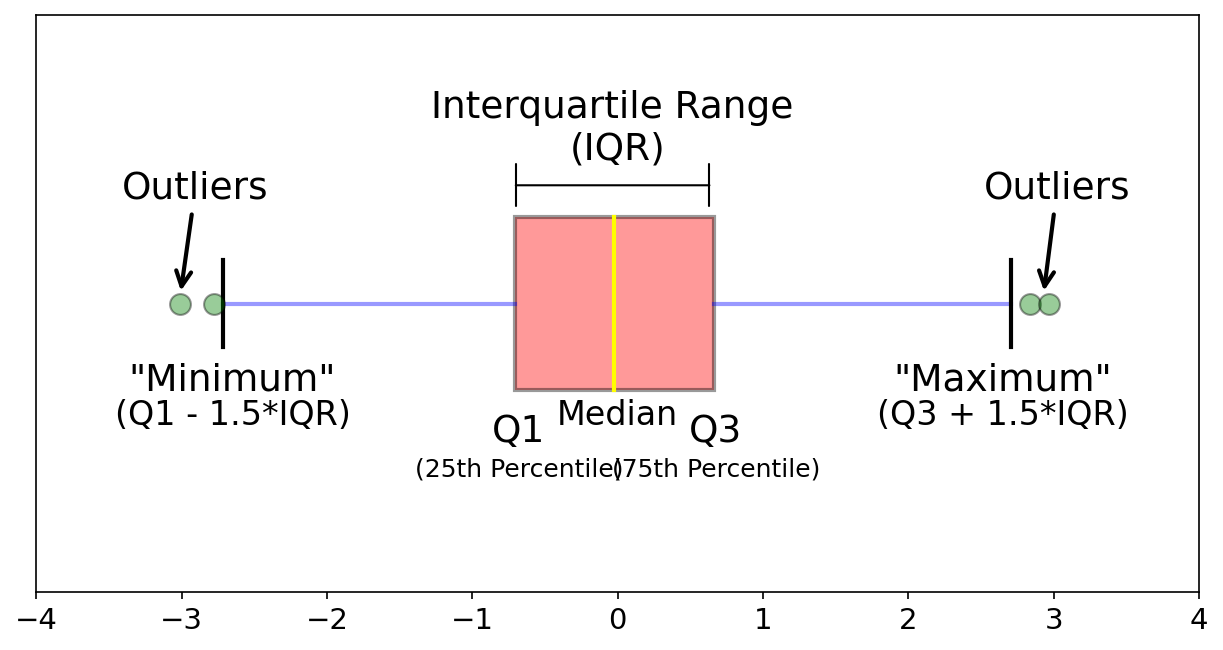

In [10]:
np.random.seed(916170)

# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=True, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                flierprops = dict(marker='o', markerfacecolor='green', markersize=10,
                  linestyle='none', alpha = .4),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
plt.xticks(fontsize = 14)

axes.set_yticks([])
axes.annotate(r'',
            xy=(-.73, .205), xycoords='data',
            xytext=(.66, .205), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .25, "Interquartile Range \n(IQR)",  horizontalalignment='center', fontsize=18)
axes.text(0, -.21, r"Median", horizontalalignment='center', fontsize=16);
axes.text(2.65, -.15, "\"Maximum\"", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.15, "\"Minimum\"", horizontalalignment='center', fontsize=18);
axes.text(-.68, -.24, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.65, -.21, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16);
axes.text(.6745, -.24, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(.6745, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12);
axes.text(2.65, -.21, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16);

axes.annotate('Outliers', xy=(2.93,0.015), xytext=(2.52,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

axes.annotate('Outliers', xy=(-3.01,0.015), xytext=(-3.41,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

## plotly로 boxplot 그리기

`-` 로컬에서 하기 위해서는 아래를 설치 (코랩은 필요없음)

    !pip install plotly 
    !pip install ipywidgets
    !pip install jupyter-dash
    !pip install dash 
    !pip install pandas

In [11]:
import plotly.express as px 
import pandas as pd

In [12]:
df= pd.DataFrame({'score':y1+y2,'class':['A']*len(y1) + ['B']*len(y2)})
df

In [13]:
px.box(df,x='class',y='score')

# histogram

## motivating example

`-` 전북고예제에서 우리의 소망: 그냥 A반 B반 중에 어떤 반이 공부를 더
잘하냐?

-   보통 이러한 질문은 **중심경향값** 중 하나를 골라서 비교하면 되었다.
-   여기에서 **중심경향값**이란 데이터 분포의 중심을 보여주는 값으로
    자료 전체를 대표할 수 있는 값을 말함. 평균, 중앙값등이 대표적인
    중심경향값이다.

`-` 전북고예제에서는 “A반 B반 중에서 어떤 반이 공부를 더 잘하냐?” 라는
질문의 대답으로 단순평균비교로는 의미가 없었다. 오히려 결과론적으로 보면
중앙값이 더 타당해 보인다.

`-` 그런데 사실 생각해보면 중앙값을 기준으로 B반이 공부를 더 잘했다고
주장하는 것도 애매하다. 어쨌든 가장 공부잘한 학생은 A반에 있으니까!
(에이 한명 뿐이잖아요? 라고 생각할 수 있는데 그 한명이 2명 3명으로 점점
늘어난다고 생각해보자, 합리적인 기준을 제시할 수 있는가?)

`-` 사실 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문은 굉장히
대답하기 곤란한 질문이다. 왜냐하면

-   이슈1: 단순 평균비교로 이러한 질문에 답을 하기 어렵다.
-   이슈2: 박스플랏으로 전체분포를 파악해도 어떠한 반이 더 공부를
    잘한다는 기준을 잡는게 애매하다.

그런데 특수한 경우에는 “A반 B반중에 누가 더 공부를 잘하냐?” 라는 질문에
대한 대답을 깔끔하게 할 수 있다.

**(예제2) 정규분포 전북고등학교: 평균은 좋은 측정값인가?**

`-` A반과 B반의 통계학 성적이 아래와 같다고 하자.

In [14]:
np.random.seed(43052)
y1 = np.random.randn(10000)
y2 = np.random.randn(10000) + 0.5 

In [15]:
np.mean(y1),np.mean(y2)

In [16]:
np.mean(y2) - np.mean(y1)

y2의 값이 y1의 값보다 전체적으로 0.5097056259662253 정도 높다고 볼 수
있다?

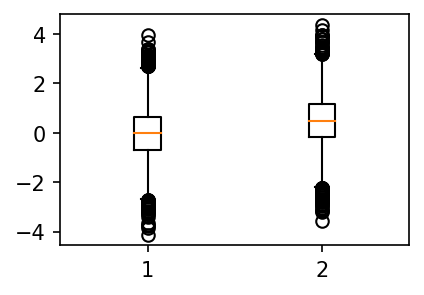

In [17]:
plt.boxplot([y1,y2]);

-   분포의 모양이 거의 비슷, 왼쪽그림을 컨트롤+C 하여 오른쪽에 붙인다음
    0.5정도 y축으로 올린느낌이다!

`-` 이러한 상황에서는 “B반의 성적 $\approx$ A반의 성적 + 0.5” 라고
주장해도 큰 무리가 없어보인다. 따라서 이 경우에는 “A반 B반 중에 어떤반이
더 공부를 잘하냐?” 라는 질문에 대하여 “B반이 평균적으로 0.5점정도 더
공부를 잘합니다” 라고 대답해도 괜찮다.

`-` 결론: 정규분포 분포가정을 한다면 이슈1,2에 대한 문제를 한번에
해결가능함

`-` 정규분포가정은 어떻게 할 수 있나? (= 데이터를 보고 어떻게
정규분포라고 알 수 있는가?): 데이터의 히스토그램을 그려서 종 모양이
되는지 확인해본다. (아직 초보단걔라서 이것밖에 모를 수 있어요)

### histogram 이란?

`-` 히스토그램: X축이 변수의 구간, Y축은 그 구간에 포함된 빈도를
의미하는 그림

### matplotlib으로 histogram 그리기

`-` 히스토그램의 예시1

In [18]:
y=[10,11,12,15,16,20,21,22,23,24,25]

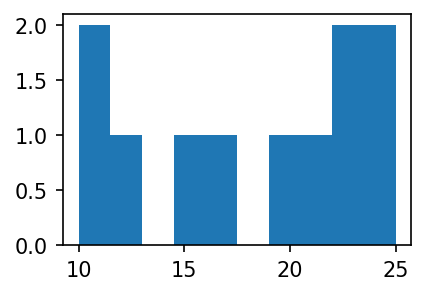

In [19]:
plt.hist(y)

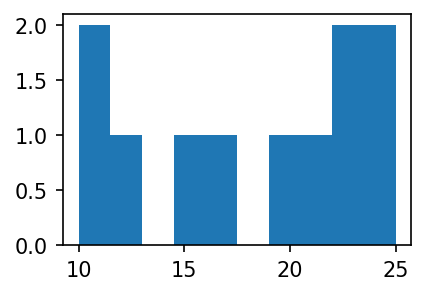

In [20]:
plt.hist(y,bins=10)

`-` 히스토그램 예시2

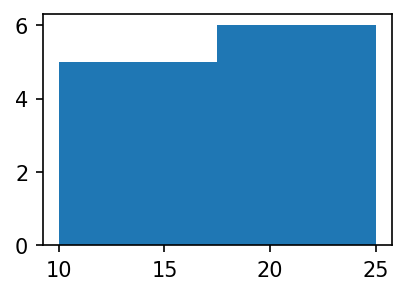

In [21]:
plt.hist(y,bins=2)
#plt.hist(y,bins=1)

`-` 히스토그램 예시3

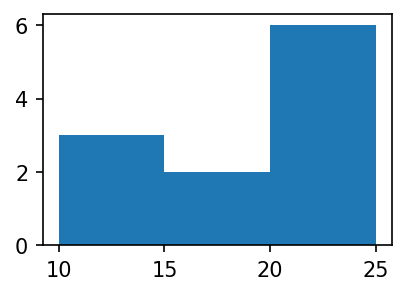

In [22]:
plt.hist(y,bins=3)

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 3 = 5 이므로 각 구간의 간격은 5이다.
-   구간은 \[10,15), \[15,20), \[20,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,2,6 이다.

`-` 히스토그램 예시4

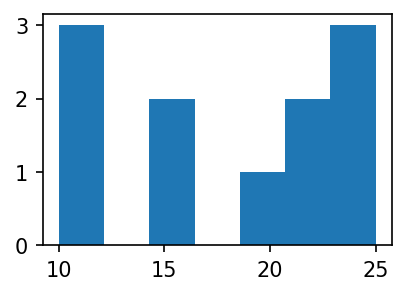

In [23]:
plt.hist(y,bins=7) 

-   가장 큰 값은 25, 가장 작은 값은 10이므로 range는 15이다.
-   range / bins = 15 / 7 = 2.142857142857143 이므로 각 구간의 간격은
    2.142857142857143이다.
-   구간은 \[10,12.14285714), \[12.14285714,14.28571429,),
    \[22.85714286,25\] 로 나눈다.
-   각 구간에 포함된 자료의 수는 3,0,2,0,1,2,3 이다.

`-` 히스토그램 예시5

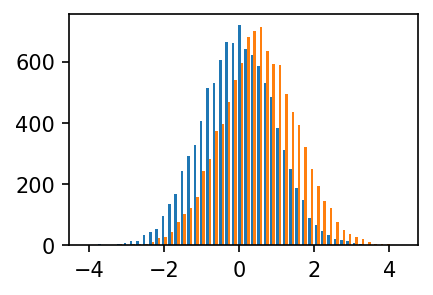

In [24]:
# np.random.seed(43052)
# y1 = np.random.randn(10000)
# y2 = np.random.randn(10000) + 0.5 
plt.hist([y1,y2],bins=50);

### seaborn으로 histogram 그리기

In [30]:
import seaborn as sns 

In [31]:
df=pd.DataFrame({'score':np.concatenate([y1,y2]), 'class':['A']*len(y1)+['B']*len(y2)})
df

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

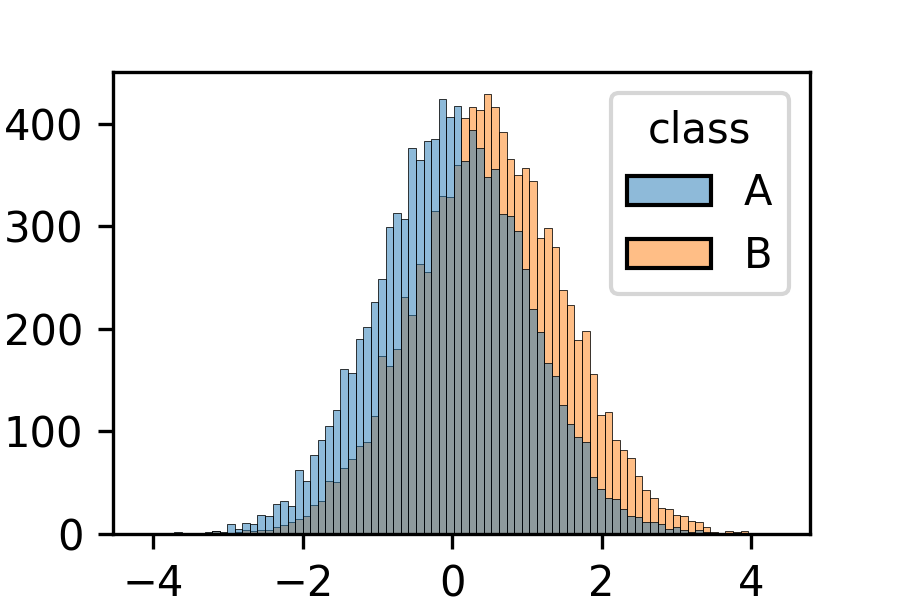

In [33]:
sns.histplot(df,x='score',hue='class')

### plotnine으로 histogram 그리기

In [34]:
from plotnine import *

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 84'. Pick better value with 'binwidth'.

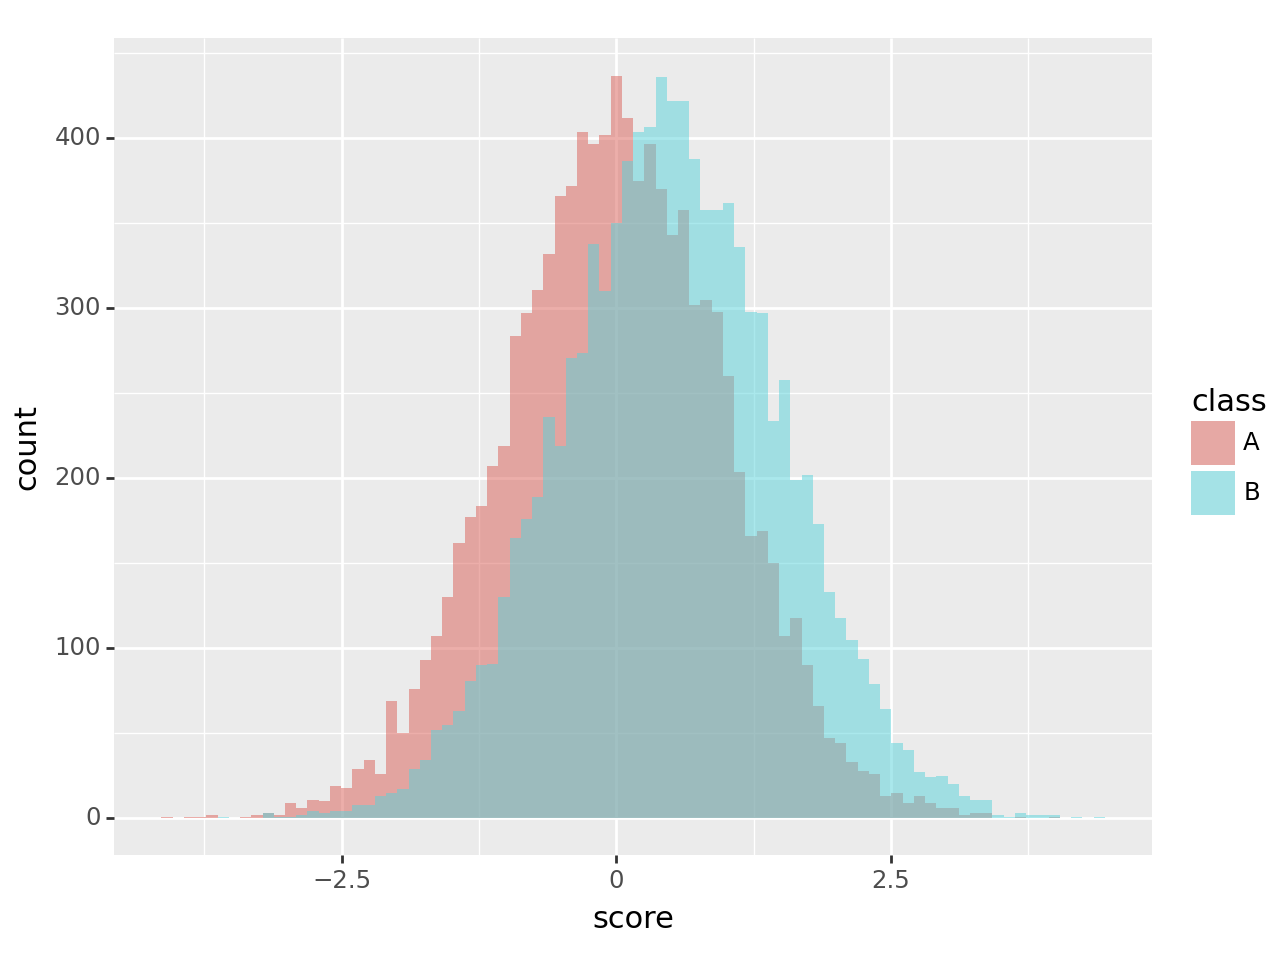

In [35]:
ggplot(df) + geom_histogram(aes(x='score',fill='class'),position='identity',alpha=0.5)

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 84'. Pick better value with 'binwidth'.

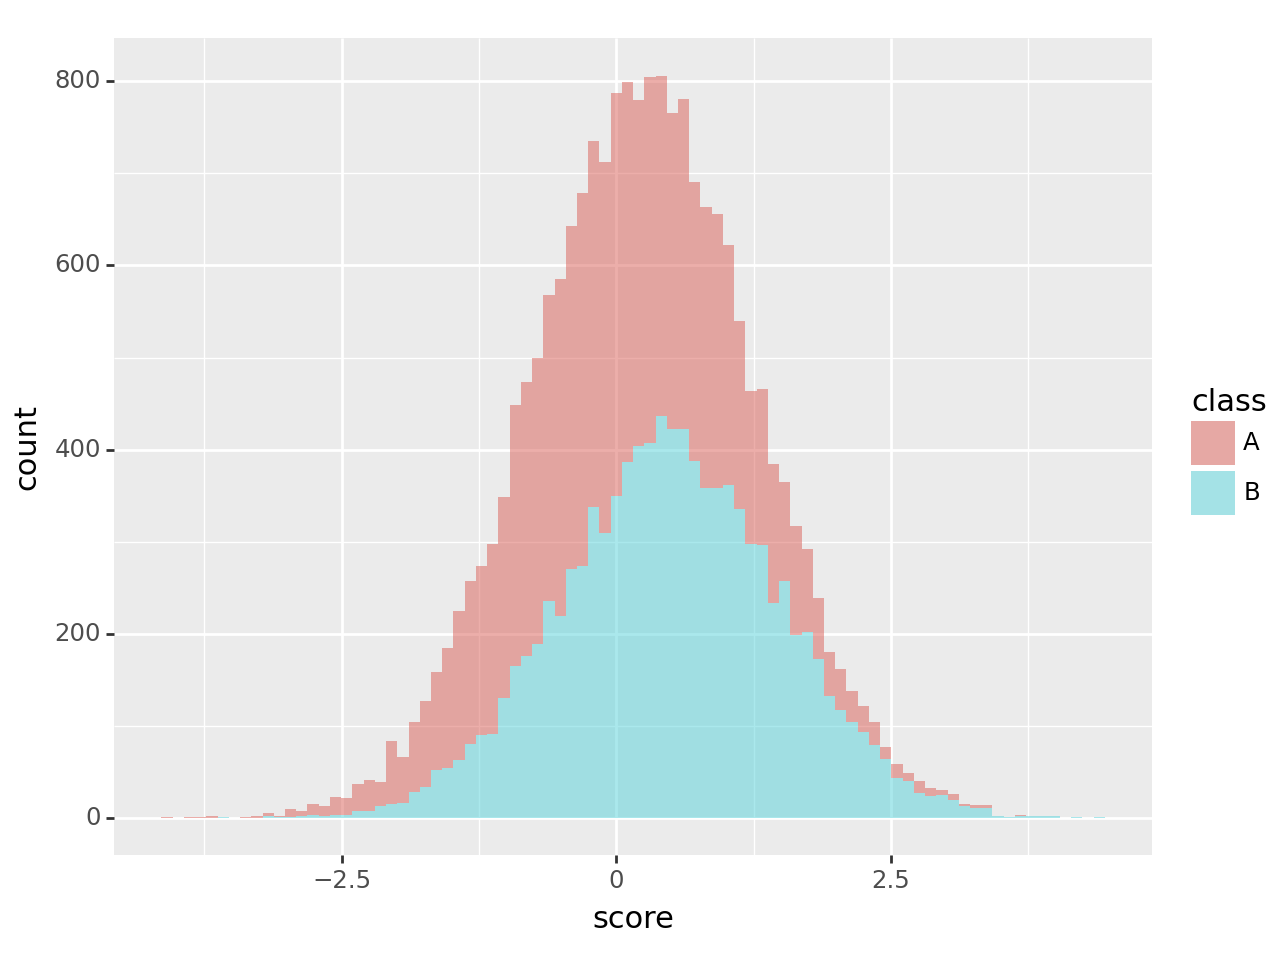

In [36]:
ggplot(df) + geom_histogram(aes(x='score',fill='class'),alpha=0.5) ## 비교를 위해서 관찰만 할것

### plotly로 histogram 그리기

In [44]:
px.histogram(df,x='score',color='class',barmode='overlay')

## 숙제

`(1)` 자기학번으로 np.random.seed(202043052)를 만들고

`(2)` y1, y2 // 10만개의 정규분포를 생성해서 저장

-   y1: 평균 0, 표준편차=1
-   y2: 평균 1, 표준편차=1

`(3)` plotly 를 활용하여 히스토그램을 겹쳐서 그려보는것.

Galarnyk, Michael. 2023. “Python_tutorials.”
<https://github.com/mGalarnyk/Python_Tutorials>.